                                          AtliQ Grands Hotels Analysis

Problem Statement:
Atliq Grands, a leading player in India's hotel industry, is currently facing challenges with rising competition and declining revenue. The company is also experiencing a loss of market share. To combat these challenges, the management team has decided to harness data and strategic insights. With limited internal expertise in data analysis, they have sought external support to assess the situation, deliver actionable insights, and develop effective strategies for customer retention and revenue growth.

Project Goal:
The goal of this project is to conduct a comprehensive analysis of the hotel industry domain using Python. By leveraging data-driven insights and strategic recommendations, the objective is to empower Atliq Grands to make informed decisions. The ultimate aim is to assist Atliq Grands in regaining a competitive edge in the market, addressing their challenges of revenue decline and market share loss e

Datasets:
We have 5 csv files

dim_date.csv
dim_hotels.csv
dim_rooms.csv
fact_aggregated_bookings
fact_bookings.csv

dim_date.csv: This dataset contains information about dates and related attributes.
dim_hotels.csv: This dataset contains details about different hotels, including their types and locations.
dim_rooms.csv: This dataset provides information about the rooms available in the hotels, such as room types and capacities.
fact_aggregated_bookings.csv: This dataset contains aggregated information about hotel bookings, including the total number of bookings and revenue for each hotel.
fact_bookings.csv: This dataset contains individual booking records with specific details, including booking dates, customer information, and room details.

Data Analysis Process:
Data Import & Exploration
Data Cleaning
Data Transformation
Data Insights
Key Insights Summary
Recommendations

1. Data Import and Data Exploration

In [2]:
import pandas as pd

Fact_bookings.csv: This dataset contains individual booking records with specific details, including booking dates, customer information, check-in and check-out details, room details etc.

In [3]:
#Read bookings data in a dataframe
df_bookings = pd.read_csv('datasets/fact_bookings.csv')

In [4]:
#Explore bookings data
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [5]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [9]:
df_bookings.shape  #this dataset has 134590 records and 12 columns

(134590, 12)

In [7]:
df_bookings.columns  #to display the columns present in the fact_bookings.csv file

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [10]:
df_bookings.room_category.unique() #there are 4 unique room categories 

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [11]:
df_bookings.room_category.nunique()

4

In [12]:
df_bookings.booking_platform.unique() #these are various booking platforms

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [13]:
df_bookings.booking_platform.nunique()

7

In [14]:
df_bookings.booking_platform.value_counts()   

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

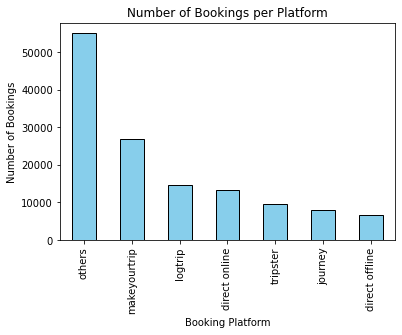

In [20]:
import matplotlib.pyplot as plt
df_bookings.booking_platform.value_counts().plot(kind="bar", color='skyblue', edgecolor='black')
# Add a title and labels
plt.title("Number of Bookings per Platform")
plt.xlabel("Booking Platform")
plt.ylabel("Number of Bookings")
plt.show()

From the above bar graph it is clear that apart from other platforms makeyourtrip is the platform where the highest bookings are made.

In [16]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


Read rest of the files

In [21]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [22]:
df_hotels.shape

(25, 4)

In [23]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [24]:
df_hotels.info

<bound method DataFrame.info of     property_id  property_name  category       city
0         16558   Atliq Grands    Luxury      Delhi
1         16559  Atliq Exotica    Luxury     Mumbai
2         16560     Atliq City  Business      Delhi
3         16561      Atliq Blu    Luxury      Delhi
4         16562      Atliq Bay    Luxury      Delhi
5         16563   Atliq Palace  Business      Delhi
6         17558   Atliq Grands    Luxury     Mumbai
7         17559  Atliq Exotica    Luxury     Mumbai
8         17560     Atliq City  Business     Mumbai
9         17561      Atliq Blu    Luxury     Mumbai
10        17562      Atliq Bay    Luxury     Mumbai
11        17563   Atliq Palace  Business     Mumbai
12        18558   Atliq Grands    Luxury  Hyderabad
13        18559  Atliq Exotica    Luxury  Hyderabad
14        18560     Atliq City  Business  Hyderabad
15        18561      Atliq Blu    Luxury  Hyderabad
16        18562      Atliq Bay    Luxury  Hyderabad
17        18563   Atliq Palace  

In [30]:
df_hotels.shape

(25, 4)

In [25]:
df_hotels.property_name.unique() #these are the various properties in Altiq group

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [29]:
df_hotels.property_name.value_counts()

Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: property_name, dtype: int64

In [28]:
df_hotels.city.unique() #Hotels are situated at namely Delhi, Mumbai, Hyderabad, and Bangalore 

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

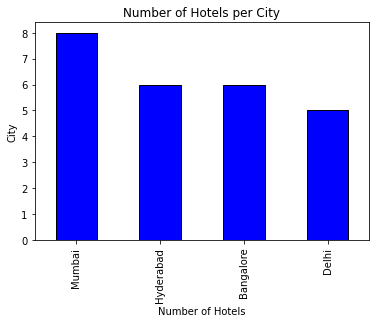

In [40]:
import matplotlib.pyplot as plt

# Plot value counts of cities as a horizontal bar chart

ax = df_hotels.city.value_counts().plot(kind="bar", color='blue', edgecolor='black')

# Add title and labels
plt.title("Number of Hotels per City")
plt.xlabel("Number of Hotels")
plt.ylabel("City")

plt.show()

In [31]:
df_hotels.city.value_counts() #Altiq group has its highest hotels in Mumbai and least in Delhi

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

In [36]:
df_hotels.category.value_counts() #luxury category is more among the rooms in the Altiq group

Luxury      16
Business     9
Name: category, dtype: int64

fact_aggregated_bookings.csv: This dataset contains aggregated information about hotel bookings, including the total number of bookings and revenue for each hotel.

In [41]:
df_agg_bookings.info

<bound method DataFrame.info of       property_id check_in_date room_category  successful_bookings  capacity
0           16559      1-May-22           RT1                   25      30.0
1           19562      1-May-22           RT1                   28      30.0
2           19563      1-May-22           RT1                   23      30.0
3           17558      1-May-22           RT1                   30      19.0
4           16558      1-May-22           RT1                   18      19.0
...           ...           ...           ...                  ...       ...
9195        16563     31-Jul-22           RT4                   13      18.0
9196        16559     31-Jul-22           RT4                   13      18.0
9197        17558     31-Jul-22           RT4                    3       6.0
9198        19563     31-Jul-22           RT4                    3       6.0
9199        17561     31-Jul-22           RT4                    3       4.0

[9200 rows x 5 columns]>

In [42]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [43]:
df_agg_bookings.property_id.unique() #unique property ids in aggregate bookings dataset

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [44]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum() #total bookings per property_id

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [45]:
#days on which bookings are greater than capacity
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [46]:
#properties that have highest capacity
df_agg_bookings.capacity.max()

50.0

2. Data Cleaning

In [47]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [48]:
# (1) Clean invalid guests
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


As we can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [49]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [50]:
df_bookings.shape

(134578, 12)

In [51]:
# (2) Outlier removal in revenue generated
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [52]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(15378.036937686695, 13500.0)

In [53]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [54]:
avg

15378.036937686695

In [55]:
std

93040.15493143328

In [56]:
higher_limit = avg + 3*std
higher_limit

294498.50173198653

In [57]:
lower_limit = avg - 3*std
lower_limit

-263742.4278566132

In [58]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [59]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [63]:
df_bookings.shape

(134573, 12)

In [61]:
df_bookings[df_bookings.revenue_generated<=higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [64]:
df_bookings.shape

(134573, 12)

In [65]:
df_bookings.revenue_realized.describe().round(2)

count    134573.00
mean      12695.98
std        6927.79
min        2600.00
25%        7600.00
50%       11700.00
75%       15300.00
max       45220.00
Name: revenue_realized, dtype: float64

In [66]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.3586618449

In [67]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [68]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe().round(2)

count    16071.00
mean     23439.31
std       9048.60
min       7600.00
25%      19000.00
50%      26600.00
75%      32300.00
max      45220.00
Name: revenue_realized, dtype: float64

In [69]:
df_bookings[df_bookings.booking_id=="May012216558RT213"]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [70]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64